<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week07/confusion_matrix_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Work from Classification Tree Exercise

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ6Pj2kIEnk9RhcbY0fItXlvLcxraxW0P6V236KZpkgxWse9NDfdox6-WfLWEtb4T9edwJFNIBUdzvm/pub?output=csv'
df = pd.read_csv(url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Explore the data
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

# Chekc the balance of the target
df['diagnosis'].value_counts(normalize = True)

Duplicates: 0
Missing Values: 0


B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [4]:
# Set the target and features
X = df.drop(columns = 'diagnosis')
y = df['diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [5]:
# Instantiate a decision tree model
dec_tree = DecisionTreeClassifier(random_state = 42)

# Train the decision tree
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
# Evaluate the decision tree
print("Train R2:", dec_tree.score(X_train, y_train))
print("Test R2:", dec_tree.score(X_test, y_test))

Train R2: 1.0
Test R2: 0.951048951048951


In [7]:
# Instantiate a bagging tree model
bag_tree = BaggingClassifier(random_state = 42)

# Train the bagging tree model
bag_tree.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [8]:
# Evaluate the bagging tree
print('Train R2:', bag_tree.score(X_train, y_train))
print('Test R2:', bag_tree.score(X_test, y_test))

Train R2: 0.9929577464788732
Test R2: 0.951048951048951


In [9]:
# Instantiate a random forest
rf = RandomForestClassifier(random_state = 42)

# Train the random forest
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluate the random forest
print('Train R2:', rf.score(X_train, y_train))
print('Test R2:', rf.score(X_test, y_test)) 

Train R2: 1.0
Test R2: 0.972027972027972


# Confusion Matrix Exercise

In [11]:
# Imports
from sklearn.metrics import ConfusionMatrixDisplay

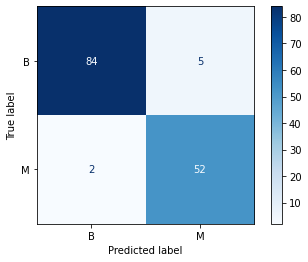

In [13]:
# Construct a confusion matrix display for teh decision tree
ConfusionMatrixDisplay.from_estimator(dec_tree,
                                      X_test,
                                      y_test,
                                      cmap = 'Blues')

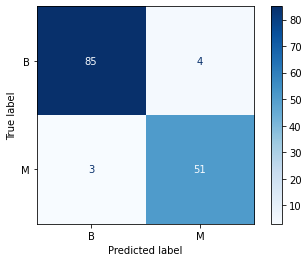

In [15]:
# Construct a confusion matrix for the bagging regressor
ConfusionMatrixDisplay.from_estimator(bag_tree,
                                      X_test,
                                      y_test,
                                      cmap = 'Blues')

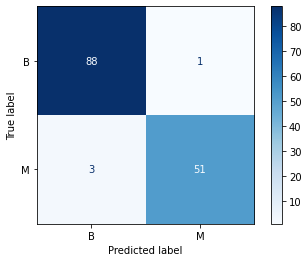

In [17]:
# Construct a confusion matrix display for the random forest
ConfusionMatrixDisplay.from_estimator(rf,
                                      X_test,
                                      y_test,
                                      cmap = 'Blues')

1. The decision tree had an accuracy of 0.951. I computed this using the number of correct predicitons divided by the total number of predictions. (Why is this the same as the R2 score?) The bagging tree had the same accuracy. The random forest had an accuracy of 0.972

2. Malignant is considered the positive class. 

3. With the random forest there were three false positives.

4. With the random forest there was one false negative.

5. The consequence of a false positive is needlessly going through cancer treatment. This is obviously an undesirable outcome. However, a false negative would mean a patient had undetected cancer and would miss out on potentially lifesaving treatment. So while both of the false outcomes would be bad, the false negative would more likely result in the death of the patient.

